In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from transformers import AutoTokenizer, AutoModelForSequenceClassification

plt.style.use('ggplot')

import nltk

In [99]:
# Read in data
df = pd.read_csv('Reviews.csv')

print(df.shape)

(568454, 10)


In [100]:
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [101]:
df['Text'] = df['Text'].apply(remove_html_tags)

In [102]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


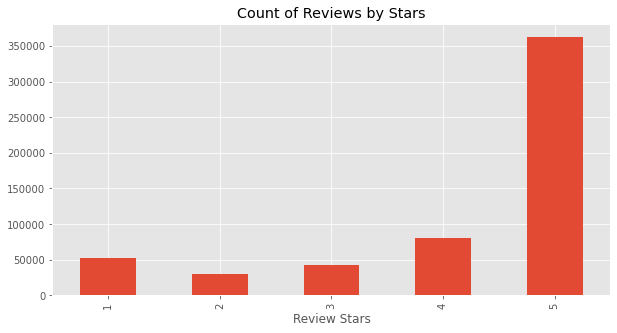

In [103]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [104]:


print("Original DataFrame:")
print(df)

# Filter rows with description length greater than 15 characters
df_long_desc = df[df['Text'].str.len() > 15]

# Drop duplicates in the filtered DataFrame
df_long_desc_no_duplicates = df_long_desc.drop_duplicates(subset='Text', keep='first')

# Remove the rows with long descriptions from the original DataFrame
df_filtered = df[df['Text'].str.len() <= 15]

# Concatenate the filtered rows and the rows with unique long descriptions
df_result = pd.concat([df_filtered, df_long_desc_no_duplicates], ignore_index=True)

print("\nDataFrame after dropping duplicates in 'description' column for descriptions longer than 15 characters:")
print(df_result)
df = df_result

Original DataFrame:
            Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  H

In [105]:
df_sorted = df.sort_values('HelpfulnessDenominator', ascending=False)
df_sorted.head(30)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
168203,207713,B00012182G,A1JUGIQDY6UYSM,"BabbChuck ""BabbChuck""",844,923,3,1252368000,Whole Rabbit - NOT!,"I ordered one of these Fresh ""Whole"" Rabbits, ..."
157268,190734,B000FI4O90,A1GQGYROVZVW49,P. Schmidt,866,878,5,1164672000,Works as Advertised - Classy Product,see update at end of review******************I...
392552,566780,B001PQTYN2,A1QB2Y8GSME58Y,Benjamin Chodroff,808,815,5,1260748800,sauce not for mortals,I purchased a burrito from a small shop a few ...
186658,235723,B001F10XUU,A39V22BIBUMMB3,"Y. Hughes ""Notmyrealname""",580,593,1,1309564800,Lost in Translation: Truth,"This product is called ""Hunmatsu-RyokuCha,"" in..."
178300,222938,B000UUWECC,AU3GYRAKBUAEU,Jon Norris,491,569,3,1212278400,"not bad stuff, but I have serious questions",Coconut water is the liquid inside an unopened...
85480,96105,B00859FH7O,A1B4MIXYVIKMU2,"D. Truong ""Duke of New Mexico""",559,562,5,1314921600,Works great! But how does it compare to Solofi...,This Ecobrew reusable Keurig K-cup is great fo...
234441,303075,B005K0L2U2,A3RGPBC7HZA8V4,"EMC ""neelie klop""",538,544,5,1292284800,Money saver!!,"As a huge fan of Keurig brewing, I was delight..."
78758,88408,B001D0KG4Q,A1RCLICH0OO12,R. Hiltz,536,539,5,1185840000,"Good sampler, but what's included?",Good opportunity to sample some of the various...
157269,190735,B000FI4O90,A3KTISKYS55LQ7,"M. Boomgarden ""Mike B""",524,536,2,1188259200,A Nice Item That Makes a Horrible Racket,I bought an AeroGarden for my wife back in May...
274567,373777,B004WTHCO2,A233OPIX0YGN98,"ic ""ic""",488,496,5,1235520000,A Slacker Mom's dream,"I love this gadget. Compact, all-in-one, easy..."


In [106]:
median_score = df['HelpfulnessDenominator'].mean()
median_score

2.2036238991345534

In [107]:
um_zero = (df['HelpfulnessDenominator'] == 0).sum()
um_zero

184490

In [108]:
df['HelpfulnessRatio'] = df.apply(lambda row: row['HelpfulnessNumerator'] / row['HelpfulnessDenominator'] if row['HelpfulnessDenominator'] != 0 else -1, axis=1)

(-1.0, -0.6]         0
(-0.6, -0.2]         0
(-0.2, 0.2]      25317
(0.2, 0.6]       25008
(0.6, 1.0]      158737
(1.0, 1.4]           0
(1.4, 1.8]           1
(1.8, 2.2]           0
(2.2, 2.6]           0
(2.6, 3.0]           1
Name: HelpfulnessRatio, dtype: int64


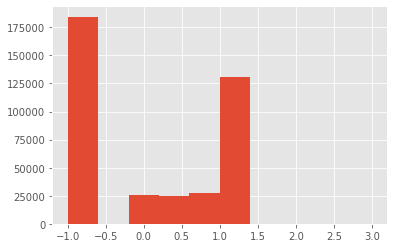

In [109]:
hist, bins, _ = plt.hist(df['HelpfulnessRatio'])

# Get the count of rows in each bin
bin_counts = pd.cut(df['HelpfulnessRatio'], bins=bins).value_counts(sort=False)

# Print the bin counts
print(bin_counts)

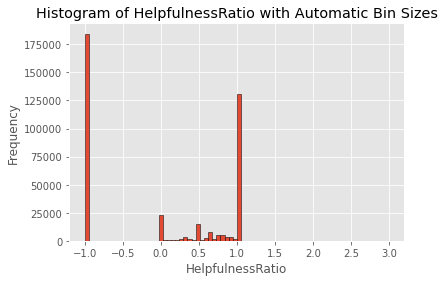

Bin 1: Range (-1.0, -0.9459459459459459), Rows: 184490
Bin 2: Range (-0.9459459459459459, -0.8918918918918919), Rows: 0
Bin 3: Range (-0.8918918918918919, -0.8378378378378378), Rows: 0
Bin 4: Range (-0.8378378378378378, -0.7837837837837838), Rows: 0
Bin 5: Range (-0.7837837837837838, -0.7297297297297297), Rows: 0
Bin 6: Range (-0.7297297297297297, -0.6756756756756757), Rows: 0
Bin 7: Range (-0.6756756756756757, -0.6216216216216216), Rows: 0
Bin 8: Range (-0.6216216216216216, -0.5675675675675675), Rows: 0
Bin 9: Range (-0.5675675675675675, -0.5135135135135135), Rows: 0
Bin 10: Range (-0.5135135135135135, -0.45945945945945943), Rows: 0
Bin 11: Range (-0.45945945945945943, -0.4054054054054054), Rows: 0
Bin 12: Range (-0.4054054054054054, -0.3513513513513513), Rows: 0
Bin 13: Range (-0.3513513513513513, -0.29729729729729726), Rows: 0
Bin 14: Range (-0.29729729729729726, -0.2432432432432432), Rows: 0
Bin 15: Range (-0.2432432432432432, -0.18918918918918914), Rows: 0
Bin 16: Range (-0.189189

In [110]:
plt.hist(df['HelpfulnessRatio'], bins='auto', edgecolor='black')
plt.xlabel('HelpfulnessRatio')
plt.ylabel('Frequency')
plt.title('Histogram of HelpfulnessRatio with Automatic Bin Sizes')
plt.show()

# Print the amount of rows in each bin
counts, bin_edges = np.histogram(df['HelpfulnessRatio'], bins='auto')
for i in range(len(counts)):
    print(f"Bin {i+1}: Range ({bin_edges[i]}, {bin_edges[i+1]}), Rows: {counts[i]}")

In [111]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio
0,453669,B0001QYYUK,A3S7N11XRRTUU6,Bob,5,14,1,1136246400,Not worth it,Not worth it,0.357143
1,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.000000
2,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.000000
3,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.000000
4,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
393549,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,-1.000000
393550,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,-1.000000
393551,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.000000
393552,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,1.000000


In [112]:
from math import sqrt

def wilson_lower_bound(helpful_votes, total_votes, confidence=0.95):
    """
    Calculate the lower bound of Wilson Score Interval.
    
    helpful_votes: int, number of helpful votes (helpfulnessNominator)
    total_votes: int, total number of votes (helpfulnessDenominator)
    confidence: float, the desired confidence level (default: 0.95)
    
    Returns the lower bound of Wilson Score Interval as a float.
    """
    if total_votes == 0:
        return 0
    z = 1.96  # z-score for 95% confidence interval
    phat = float(helpful_votes) / total_votes
    inner_sqrt = (phat * (1 - phat) + z**2 / (4 * total_votes)) / total_votes
    if inner_sqrt < 0:
        inner_sqrt = 0  # Prevent math domain error
    denominator = 1 + z**2/total_votes
    numerator = phat + z**2 / (2 * total_votes) - z * sqrt(inner_sqrt)
    return numerator / denominator

In [113]:
df['wilson_score'] = df.apply(lambda row: wilson_lower_bound(row['HelpfulnessNumerator'], row['HelpfulnessDenominator']), axis=1)

# Set a threshold for wilson_score to filter out low helpfulness reviews
threshold = 0.15
filtered_df = df[df['wilson_score'] >= threshold]

# You can also sort the DataFrame by the Wilson Score
sorted_df = df.sort_values(by='wilson_score', ascending=False)

In [114]:
filtered_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,wilson_score
0,453669,B0001QYYUK,A3S7N11XRRTUU6,Bob,5,14,1,1136246400,Not worth it,Not worth it,0.357143,0.163445
1,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.000000,0.206543
3,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.000000,0.206543
4,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.000000,0.438494
9,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.000000,0.206543
...,...,...,...,...,...,...,...,...,...,...,...,...
393540,568441,B005ZC0RRO,A2TO5R8QLIITEF,SAK,1,1,5,1323734400,"Delicious, all natural and allergy free treats!",Indie Candy's gummies are absolutely delicious...,1.000000,0.206543
393544,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po...",1.000000,0.438494
393545,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A...",1.000000,0.342372
393551,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.000000,0.342372


In [115]:
df = filtered_df
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,wilson_score
0,453669,B0001QYYUK,A3S7N11XRRTUU6,Bob,5,14,1,1136246400,Not worth it,Not worth it,0.357143,0.163445
1,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.000000,0.206543
3,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.000000,0.206543
4,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.000000,0.438494
9,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.000000,0.206543
...,...,...,...,...,...,...,...,...,...,...,...,...
393540,568441,B005ZC0RRO,A2TO5R8QLIITEF,SAK,1,1,5,1323734400,"Delicious, all natural and allergy free treats!",Indie Candy's gummies are absolutely delicious...,1.000000,0.206543
393544,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po...",1.000000,0.438494
393545,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A...",1.000000,0.342372
393551,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.000000,0.342372


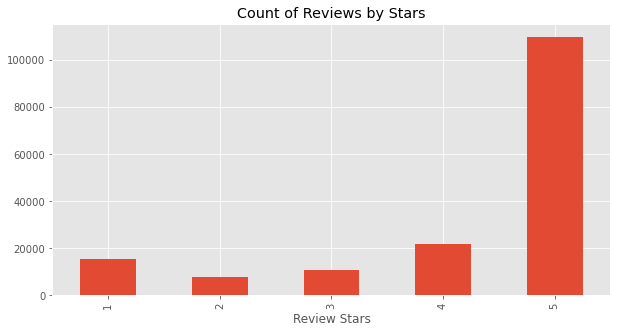

In [116]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [117]:
example = df['Text'][83]
print(example)

While my dogs like all of the flavors that we have tried of this dog food, for some reason their itching increased when I tried the lamb and rice. I have some very itchy dogs and am giving them a limited ingredient dog food to try to help. The duck and sweet potato cut down on the itching significantly, but when we tried lamb and rice they started itching more once again. I like Natural Balance for the quality ingredients.


In [118]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['While', 'my', 'dogs', 'like', 'all', 'of', 'the', 'flavors', 'that', 'we']

In [119]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('While', 'IN'),
 ('my', 'PRP$'),
 ('dogs', 'NNS'),
 ('like', 'IN'),
 ('all', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('flavors', 'NNS'),
 ('that', 'IN'),
 ('we', 'PRP')]

In [120]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  While/IN
  my/PRP$
  dogs/NNS
  like/IN
  all/DT
  of/IN
  the/DT
  flavors/NNS
  that/IN
  we/PRP
  have/VBP
  tried/VBN
  of/IN
  this/DT
  dog/NN
  food/NN
  ,/,
  for/IN
  some/DT
  reason/NN
  their/PRP$
  itching/NN
  increased/VBD
  when/WRB
  I/PRP
  tried/VBD
  the/DT
  lamb/NN
  and/CC
  rice/NN
  ./.
  I/PRP
  have/VBP
  some/DT
  very/RB
  itchy/JJ
  dogs/NNS
  and/CC
  am/VBP
  giving/VBG
  them/PRP
  a/DT
  limited/JJ
  ingredient/NN
  dog/NN
  food/NN
  to/TO
  try/VB
  to/TO
  help/VB
  ./.
  The/DT
  duck/NN
  and/CC
  sweet/VB
  potato/NN
  cut/NN
  down/RP
  on/IN
  the/DT
  itching/NN
  significantly/RB
  ,/,
  but/CC
  when/WRB
  we/PRP
  tried/VBD
  lamb/NN
  and/CC
  rice/NN
  they/PRP
  started/VBD
  itching/VBG
  more/JJR
  once/RB
  again/RB
  ./.
  I/PRP
  like/IN
  (ORGANIZATION Natural/NNP Balance/NNP)
  for/IN
  the/DT
  quality/NN
  ingredients/NNS
  ./.)


In [121]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [122]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [123]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [124]:
sia.polarity_scores(example)

{'neg': 0.055, 'neu': 0.767, 'pos': 0.178, 'compound': 0.8642}

In [125]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/165541 [00:00<?, ?it/s]

In [126]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [127]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,wilson_score
0,453669,0.454,0.546,0.000,-0.1695,B0001QYYUK,A3S7N11XRRTUU6,Bob,5,14,1,1136246400,Not worth it,Not worth it,0.357143,0.163445
1,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.000000,0.206543
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.000000,0.206543
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.000000,0.438494
4,9,0.000,0.851,0.149,0.6369,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.000000,0.206543


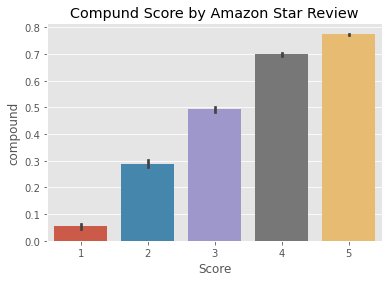

In [128]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

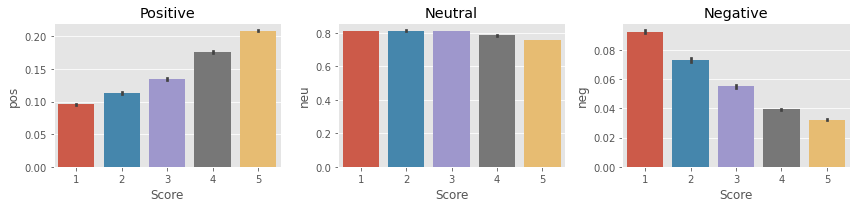

In [129]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [130]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [131]:
#MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
#tokenizer = AutoTokenizer.from_pretrained(MODEL)
#model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [135]:
import tarfile
import requests

from transformers import LongformerTokenizer, LongformerForSequenceClassification
import torch

tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')
model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096')

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

C:\ProgramData\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\deniz\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/694 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/597M [00:00<?, ?B/s]

Some weights of the model checkpoint at allenai/longformer-base-4096 were not used when initializing LongformerForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing LongformerForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LongformerForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', '

In [137]:
# VADER results on example
print(example)
sia.polarity_scores(example)

While my dogs like all of the flavors that we have tried of this dog food, for some reason their itching increased when I tried the lamb and rice. I have some very itchy dogs and am giving them a limited ingredient dog food to try to help. The duck and sweet potato cut down on the itching significantly, but when we tried lamb and rice they started itching more once again. I like Natural Balance for the quality ingredients.


{'neg': 0.055, 'neu': 0.767, 'pos': 0.178, 'compound': 0.8642}

In [138]:
'''# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)'''

"# Run for Roberta Model\nencoded_text = tokenizer(example, return_tensors='pt')\noutput = model(**encoded_text)\nscores = output[0][0].detach().numpy()\nscores = softmax(scores)\nscores_dict = {\n    'roberta_neg' : scores[0],\n    'roberta_neu' : scores[1],\n    'roberta_pos' : scores[2]\n}\nprint(scores_dict)"

In [139]:
# Run for Longformer Model
encoded_text = tokenizer(example, return_tensors='pt', max_length=4096, truncation=True)
output = model(**encoded_text)
scores = output.logits[0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'longformer_neg': scores[0],
    'longformer_pos': scores[1]
}
print(scores_dict)

{'longformer_neg': 0.5067196, 'longformer_pos': 0.49328032}


In [140]:
'''def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict'''

"def polarity_scores_roberta(example):\n    encoded_text = tokenizer(example, return_tensors='pt')\n    output = model(**encoded_text)\n    scores = output[0][0].detach().numpy()\n    scores = softmax(scores)\n    scores_dict = {\n        'roberta_neg' : scores[0],\n        'roberta_neu' : scores[1],\n        'roberta_pos' : scores[2]\n    }\n    return scores_dict"

In [146]:
def polarity_scores_longformer(text):
    encoded_text = tokenizer(text, return_tensors='pt', max_length=1000, truncation=True)
    output = model(**encoded_text)
    scores = output.logits[0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'longformer_neg': scores[0],
        'longformer_pos': scores[1]
    }
    return scores_dict

In [147]:
example = df['Text'][83]
print(example)

While my dogs like all of the flavors that we have tried of this dog food, for some reason their itching increased when I tried the lamb and rice. I have some very itchy dogs and am giving them a limited ingredient dog food to try to help. The duck and sweet potato cut down on the itching significantly, but when we tried lamb and rice they started itching more once again. I like Natural Balance for the quality ingredients.


In [148]:
example = df['Text'][528]
print(example)

I once loved these chips and they were the only chips i would buy.  I discovered them when I was in England back in 2000 and quickly became a fan.  About a year ago I picked up a bag that was on sale at my local supermarket.  I was finding it odd that they were on sale so much but took advantage of it.  After opening the bag I found the chips were not even close to the Kettle chips I was used to.  They were all uniform whitish yellow in color, flavor was way off, the lovely extra crisp brown chips were gone completely and I was very disappointed.  So I e-mailed Kettle with the following:  "What Happened? I bought this bag of chips the other day and they have a very different taste; It tastes "cheaper". I don't know how else to put it... I also noticed that the chips seemed to be less cooked as I did not see any of the browner colored chips that have the most flavor. I am hoping that nothing has changed with the ingredients or process used to produce this product. Did I just get a weird

In [149]:
'''for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError as e:
        print(f'Broke for id {myid}, error: {e}')'''

'for i, row in tqdm(df.iterrows(), total=len(df)):\n    try:\n        text = row[\'Text\']\n        myid = row[\'Id\']\n        vader_result = sia.polarity_scores(text)\n        vader_result_rename = {}\n        for key, value in vader_result.items():\n            vader_result_rename[f"vader_{key}"] = value\n        roberta_result = polarity_scores_roberta(text)\n        both = {**vader_result_rename, **roberta_result}\n        res[myid] = both\n    except RuntimeError as e:\n        print(f\'Broke for id {myid}, error: {e}\')'

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        longformer_result = polarity_scores_longformer(text)
        both = {**vader_result_rename, **longformer_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/165541 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.columns

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [ ]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]